# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

import datetime
d = datetime.datetime.today()
today = (f"{d.year}/{d.month}/{d.day}")

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 597


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}"

    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Build query URL
    query_url = f"{url}appid={weather_api_key}&units=metric&q={city}"

    # Get weather data
    city_response = requests.get(query_url)
    city_json = city_response.json()

   # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = city_json["weather"]

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_json["coord"]["lat"]
        city_lng = city_json["coord"]["lon"]
        city_max_temp = city_json["main"]["temp_max"]
        city_humidity = city_json["main"]["humidity"]
        city_clouds = city_json["main"]["humidity"]
        city_wind = city_json["clouds"]["all"]
        city_country = city_json["sys"]["country"]
        city_date = city_json["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | kalkaman
Processing Record 2 of Set 1 | kalkaman
Processing Record 3 of Set 1 | nagqu
Processing Record 4 of Set 1 | nagqu
Processing Record 5 of Set 1 | sitka
Processing Record 6 of Set 1 | sitka
Processing Record 7 of Set 1 | bilibino
Processing Record 8 of Set 1 | bilibino
Processing Record 9 of Set 1 | udachny
Processing Record 10 of Set 1 | udachny
Processing Record 11 of Set 1 | port-aux-francais
Processing Record 12 of Set 1 | port-aux-francais
Processing Record 13 of Set 1 | blackmans bay
Processing Record 14 of Set 1 | blackmans bay
Processing Record 15 of Set 1 | romans-sur-isere
Processing Record 16 of Set 1 | romans-sur-isere
Processing Record 17 of Set 1 | flying fish cove
Processing Record 18 of Set 1 | flying fish cove
Processing Record 19 of Set 1 | bamboo flat
Processing Record 20 of Set 1 | bamboo flat
Processing Record 21 of Set 1 | georgetown
Processing Record 22 of Set 1 | georget

Processing Record 91 of Set 2 | new norfolk
Processing Record 92 of Set 2 | isafjordur
Processing Record 93 of Set 2 | isafjordur
Processing Record 94 of Set 2 | christchurch
Processing Record 95 of Set 2 | christchurch
Processing Record 96 of Set 2 | ijuw
Processing Record 97 of Set 2 | ijuw
City not found. Skipping...
Processing Record 98 of Set 2 | chibougamau
Processing Record 99 of Set 2 | chibougamau
Processing Record 0 of Set 3 | espargos
Processing Record 1 of Set 3 | espargos
City not found. Skipping...
Processing Record 2 of Set 3 | altamira
Processing Record 3 of Set 3 | altamira
Processing Record 4 of Set 3 | puerto deseado
Processing Record 5 of Set 3 | puerto deseado
Processing Record 6 of Set 3 | vohipaho
Processing Record 7 of Set 3 | vohipaho
City not found. Skipping...
Processing Record 8 of Set 3 | papatowai
Processing Record 9 of Set 3 | papatowai
Processing Record 10 of Set 3 | praia da vitoria
Processing Record 11 of Set 3 | praia da vitoria
Processing Record 12 o

Processing Record 85 of Set 4 | taylor
Processing Record 86 of Set 4 | indre arna
Processing Record 87 of Set 4 | indre arna
Processing Record 88 of Set 4 | hermanus
Processing Record 89 of Set 4 | hermanus
Processing Record 90 of Set 4 | santa cruz cabralia
Processing Record 91 of Set 4 | santa cruz cabralia
Processing Record 92 of Set 4 | happy valley-goose bay
Processing Record 93 of Set 4 | happy valley-goose bay
Processing Record 94 of Set 4 | afaahiti
Processing Record 95 of Set 4 | afaahiti
Processing Record 96 of Set 4 | pimentel
Processing Record 97 of Set 4 | pimentel
Processing Record 98 of Set 4 | tanjung pandan
Processing Record 99 of Set 4 | tanjung pandan
Processing Record 0 of Set 5 | springbok
Processing Record 1 of Set 5 | springbok
Processing Record 2 of Set 5 | saint-philippe
Processing Record 3 of Set 5 | saint-philippe
Processing Record 4 of Set 5 | diamantino
Processing Record 5 of Set 5 | diamantino
Processing Record 6 of Set 5 | puerto san jose
Processing Recor

Processing Record 75 of Set 6 | north bend
Processing Record 76 of Set 6 | pemangkat
Processing Record 77 of Set 6 | pemangkat
Processing Record 78 of Set 6 | beloyarskiy
Processing Record 79 of Set 6 | beloyarskiy
Processing Record 80 of Set 6 | ta`u
Processing Record 81 of Set 6 | ta`u
Processing Record 82 of Set 6 | nadym
Processing Record 83 of Set 6 | nadym
Processing Record 84 of Set 6 | ilha de mocambique
Processing Record 85 of Set 6 | ilha de mocambique
Processing Record 86 of Set 6 | tura
Processing Record 87 of Set 6 | tura
Processing Record 88 of Set 6 | asau
Processing Record 89 of Set 6 | asau
Processing Record 90 of Set 6 | whangarei
Processing Record 91 of Set 6 | whangarei
Processing Record 92 of Set 6 | turpan
Processing Record 93 of Set 6 | turpan
Processing Record 94 of Set 6 | kaifeng
Processing Record 95 of Set 6 | kaifeng
Processing Record 96 of Set 6 | magadan
Processing Record 97 of Set 6 | magadan
Processing Record 98 of Set 6 | poronaysk
Processing Record 99 

Processing Record 75 of Set 8 | darovskoy
Processing Record 76 of Set 8 | urangan
Processing Record 77 of Set 8 | urangan
Processing Record 78 of Set 8 | bowen
Processing Record 79 of Set 8 | bowen
Processing Record 80 of Set 8 | bargara
Processing Record 81 of Set 8 | bargara
City not found. Skipping...
Processing Record 82 of Set 8 | howard springs
Processing Record 83 of Set 8 | howard springs
Processing Record 84 of Set 8 | nouadhibou
Processing Record 85 of Set 8 | nouadhibou
Processing Record 86 of Set 8 | kingscliff
Processing Record 87 of Set 8 | kingscliff
Processing Record 88 of Set 8 | fereydun kenar
Processing Record 89 of Set 8 | fereydun kenar
Processing Record 90 of Set 8 | saynshand
Processing Record 91 of Set 8 | saynshand
Processing Record 92 of Set 8 | astrakhan
Processing Record 93 of Set 8 | astrakhan
Processing Record 94 of Set 8 | srikakulam
Processing Record 95 of Set 8 | srikakulam
Processing Record 96 of Set 8 | bata
Processing Record 97 of Set 8 | bata
Proces

Processing Record 73 of Set 10 | tual
Processing Record 74 of Set 10 | takoradi
Processing Record 75 of Set 10 | takoradi
Processing Record 76 of Set 10 | darnah
Processing Record 77 of Set 10 | darnah
Processing Record 78 of Set 10 | glace bay
Processing Record 79 of Set 10 | glace bay
Processing Record 80 of Set 10 | hengchun
Processing Record 81 of Set 10 | hengchun
Processing Record 82 of Set 10 | ahau
Processing Record 83 of Set 10 | ahau
City not found. Skipping...
Processing Record 84 of Set 10 | ventspils
Processing Record 85 of Set 10 | ventspils
Processing Record 86 of Set 10 | kone
Processing Record 87 of Set 10 | kone
Processing Record 88 of Set 10 | chakulia
Processing Record 89 of Set 10 | chakulia
Processing Record 90 of Set 10 | qapqal
Processing Record 91 of Set 10 | qapqal
City not found. Skipping...
Processing Record 92 of Set 10 | snihurivka
Processing Record 93 of Set 10 | snihurivka
Processing Record 94 of Set 10 | kavaratti
Processing Record 95 of Set 10 | kavara

Processing Record 61 of Set 12 | luanda
Processing Record 62 of Set 12 | skurup
Processing Record 63 of Set 12 | skurup
Processing Record 64 of Set 12 | abepura
Processing Record 65 of Set 12 | abepura
Processing Record 66 of Set 12 | nanchang
Processing Record 67 of Set 12 | nanchang
Processing Record 68 of Set 12 | cairns city
Processing Record 69 of Set 12 | cairns city
City not found. Skipping...
Processing Record 70 of Set 12 | ola
Processing Record 71 of Set 12 | ola
Processing Record 72 of Set 12 | glencoe
Processing Record 73 of Set 12 | glencoe
Processing Record 74 of Set 12 | cadale
Processing Record 75 of Set 12 | cadale
Processing Record 76 of Set 12 | khovd
Processing Record 77 of Set 12 | khovd
Processing Record 78 of Set 12 | mkushi
Processing Record 79 of Set 12 | mkushi
Processing Record 80 of Set 12 | keetmanshoop
Processing Record 81 of Set 12 | keetmanshoop
Processing Record 82 of Set 12 | kindia
Processing Record 83 of Set 12 | kindia
Processing Record 84 of Set 12

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          568
Lat           568
Lng           568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
Country       568
Date          568
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kalkaman,51.9525,76.0211,23.13,41,41,11,KZ,1686087655
1,nagqu,31.5000,92.0000,4.48,63,63,100,CN,1686087655
2,sitka,57.0531,-135.3300,11.94,76,76,75,US,1686087078
3,bilibino,68.0546,166.4372,11.94,51,51,97,RU,1686087655
4,udachny,66.4167,112.4000,3.03,69,69,6,RU,1686087655


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kalkaman,51.9525,76.0211,23.13,41,41,11,KZ,1686087655
1,nagqu,31.5000,92.0000,4.48,63,63,100,CN,1686087655
2,sitka,57.0531,-135.3300,11.94,76,76,75,US,1686087078
3,bilibino,68.0546,166.4372,11.94,51,51,97,RU,1686087655
4,udachny,66.4167,112.4000,3.03,69,69,6,RU,1686087655


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

## How do I know which date this is?

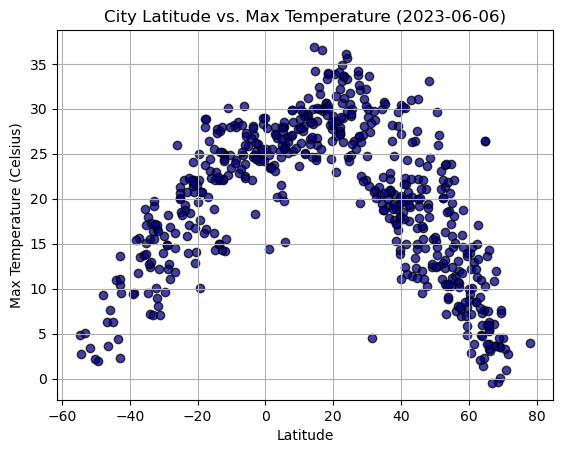

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", color="darkblue", edgecolors="black",
            alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%Y-%m-%d"))
plt.ylabel("Max Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

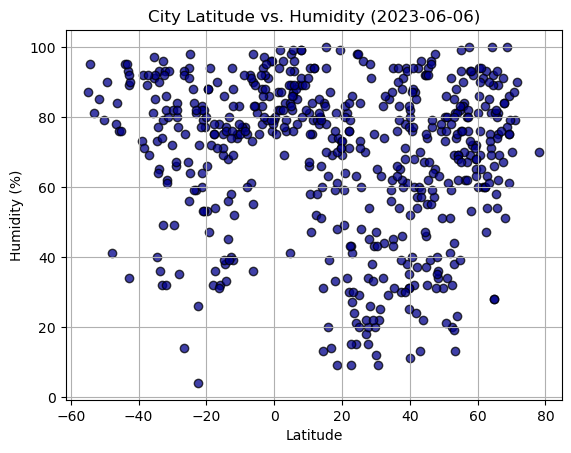

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", color="darkblue", edgecolors="black",
            alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%Y-%m-%d"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

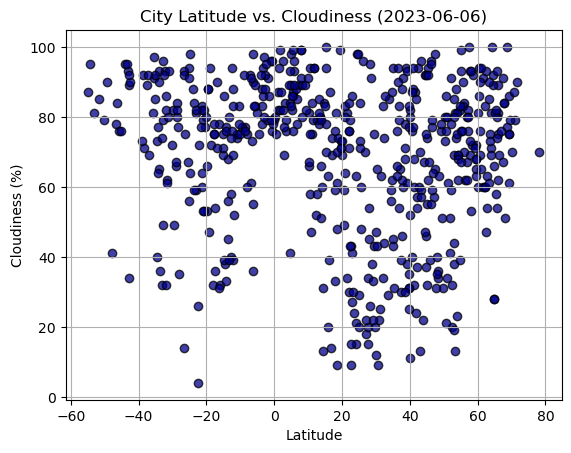

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", color="darkblue", edgecolors="black",
            alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%Y-%m-%d"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

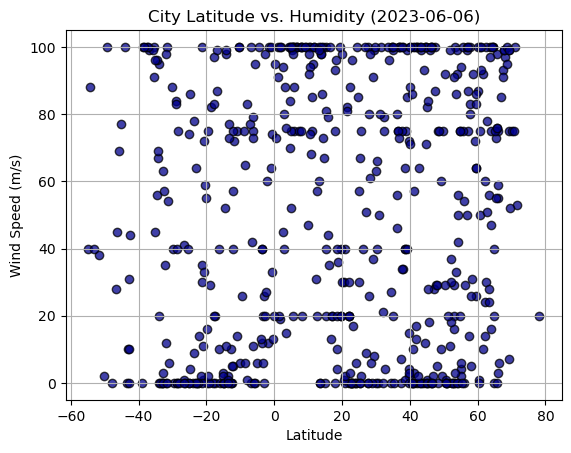

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", color="darkblue", edgecolors="black",
            alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%Y-%m-%d"))
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
#Use the equation below for the following linear regression analysis
#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#regress_values = x_values * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df["Lat"]>=0,:])

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kalkaman,51.9525,76.0211,23.13,41,41,11,KZ,1686087655
1,nagqu,31.5000,92.0000,4.48,63,63,100,CN,1686087655
2,sitka,57.0531,-135.3300,11.94,76,76,75,US,1686087078
3,bilibino,68.0546,166.4372,11.94,51,51,97,RU,1686087655
4,udachny,66.4167,112.4000,3.03,69,69,6,RU,1686087655


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df["Lat"]<0,:])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,port-aux-francais,-49.3500,70.2167,1.96,90,90,100,TF,1686087655
6,blackmans bay,-43.0167,147.3167,10.41,93,93,10,AU,1686087655
8,flying fish cove,-10.4217,105.6791,24.82,83,83,100,CX,1686087656
18,puerto natales,-51.7236,-72.4875,3.42,85,85,38,CL,1686087657
22,malango,-2.9627,119.9001,18.29,97,97,26,ID,1686087657


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.6008225321209003


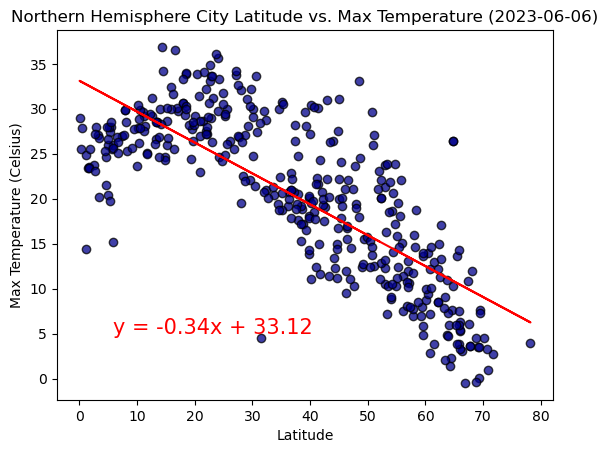

In [15]:
# Linear regression on Northern Hemisphere
# Build scatter plot for latitude vs. temperature
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], marker="o", color="darkblue", edgecolors="black",
            alpha=0.75)
#Linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])
regress_values = northern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot the linear regression line
plt.plot(northern_hemi_df["Lat"],regress_values,"r-")

#Plot the linear regression equation
plt.annotate(line_eq,(5.8,5),fontsize=15,color="red")

#Plot the r equation 
# Incorporate the other graph properties
plt.title("Northern Hemisphere City Latitude vs. Max Temperature (%s)" % time.strftime("%Y-%m-%d"))
plt.ylabel("Max Temperature (Celsius)")
plt.xlabel("Latitude")

print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.7091580056124541


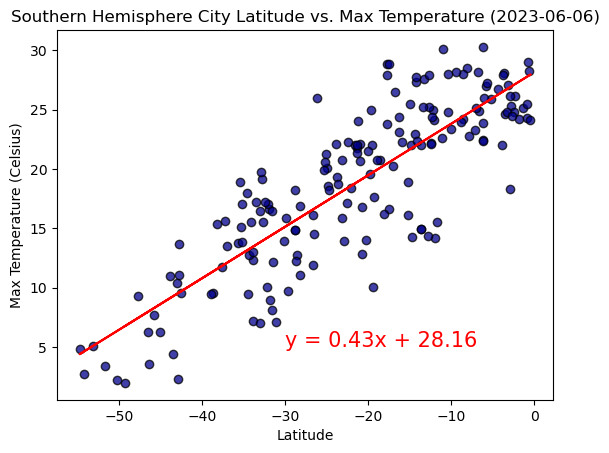

In [16]:
# Linear regression on Southern Hemisphere
# Build scatter plot for latitude vs. temperature
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], marker="o", color="darkblue", edgecolors="black",
            alpha=0.75)
#Linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])
regress_values = southern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot the linear regression line
plt.plot(southern_hemi_df["Lat"],regress_values,"r-")

#Plot the linear regression equation
plt.annotate(line_eq,(-30,5),fontsize=15,color="red")

#Plot the r equation 
# Incorporate the other graph properties
plt.title("Southern Hemisphere City Latitude vs. Max Temperature (%s)" % time.strftime("%Y-%m-%d"))
plt.ylabel("Max Temperature (Celsius)")
plt.xlabel("Latitude")

print(f"The r-value is: {rvalue**2}")

# Show
plt.show()

**Discussion about the linear relationship:** 

In the Northern Hemisphere, there appears to be a negative correlation between latitude and max temperature, as the slope appears to be moving downwards, we can see that the temperature seems to be decreasing as the latitude is increasing. This makes sense, as you think about comparing the weather in Toronto, Ontario, compared to places like Florida, or Mexico. As Toronto happens to be North of Florida or Mexico, we often have a lower temperature compared to those regions. 

In the Southern Hemisphere, there appears to be a positive correlation between latitude and max temperature, as the slope appears to be moving upwards, we can see that the temperature seems to be increasing as the latitude is increasing. 

Considering how the r-value is 0.6 and 0.7 respectively, we can note that the correlation is quite strong. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.00033240421848621166


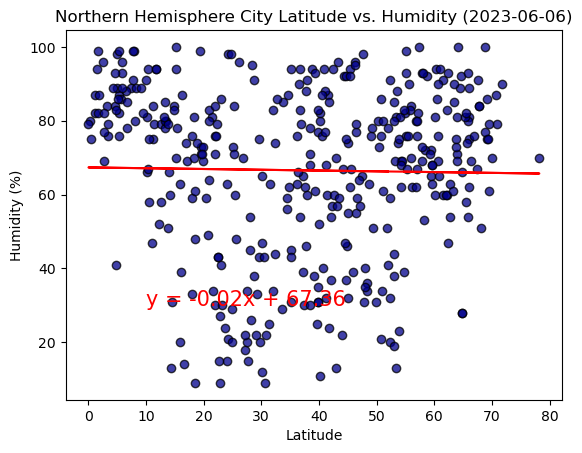

In [17]:
# Northern Hemisphere
# Build scatter plot for latitude vs. temperature
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], marker="o", color="darkblue", edgecolors="black",
            alpha=0.75)
#Linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])
regress_values = northern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot the linear regression line
plt.plot(northern_hemi_df["Lat"],regress_values,"r-")

#Plot the linear regression equation
plt.annotate(line_eq,(10,30),fontsize=15,color="red")

#Plot the r equation 
# Incorporate the other graph properties
plt.title("Northern Hemisphere City Latitude vs. Humidity (%s)" % time.strftime("%Y-%m-%d"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")

print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.00024722062345551793


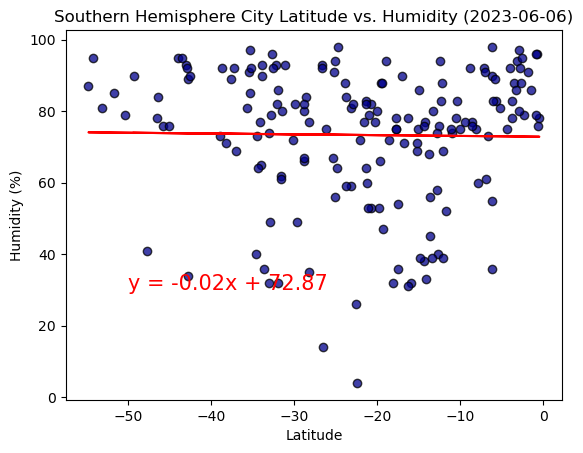

In [18]:
# Southern Hemisphere
# Build scatter plot for latitude vs. temperature
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], marker="o", color="darkblue", edgecolors="black",
            alpha=0.75)
#Linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])
regress_values = southern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot the linear regression line
plt.plot(southern_hemi_df["Lat"],regress_values,"r-")

#Plot the linear regression equation
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")

#Plot the r equation 
# Incorporate the other graph properties
plt.title("Southern Hemisphere City Latitude vs. Humidity (%s)" % time.strftime("%Y-%m-%d"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")

print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** 

The correlation between Latitude and Humidity appear to be quite weak due to the small r-value 0.0003 for the Northern Hemisphere and 0.0002 for the Southern Hemisphere, as well as the scatterplot values being quite disperesed. There seems to be a negative correlation between increasing Latitude and Humidity in the Northern Hemisphere, thus if the Latitude increases, the Humidity decreases. 

There seems to be a negative correlation between increasing Latitude and Humidity in the Southern Hemisphere, thus if the Latitude increases, the Humidity decreases. 


### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.00033240421848621166


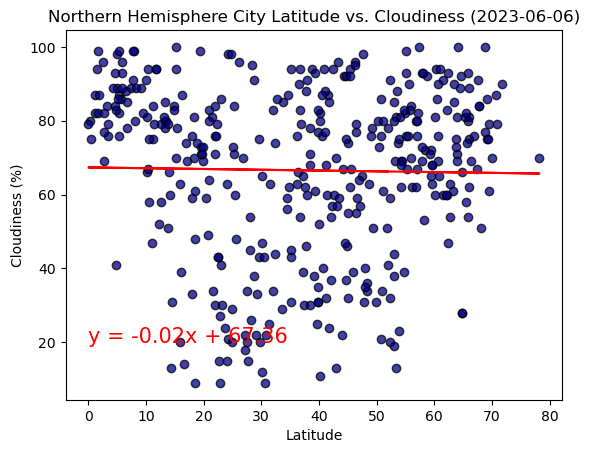

In [19]:
# Northern Hemisphere
# Build scatter plot for latitude vs. temperature
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], marker="o", color="darkblue", edgecolors="black",
            alpha=0.75)
#Linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])
regress_values = northern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot the linear regression line
plt.plot(northern_hemi_df["Lat"],regress_values,"r-")

#Plot the linear regression equation
plt.annotate(line_eq,(0,20),fontsize=15,color="red")

#Plot the r equation 
# Incorporate the other graph properties
plt.title("Northern Hemisphere City Latitude vs. Cloudiness (%s)" % time.strftime("%Y-%m-%d"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.00024722062345551793


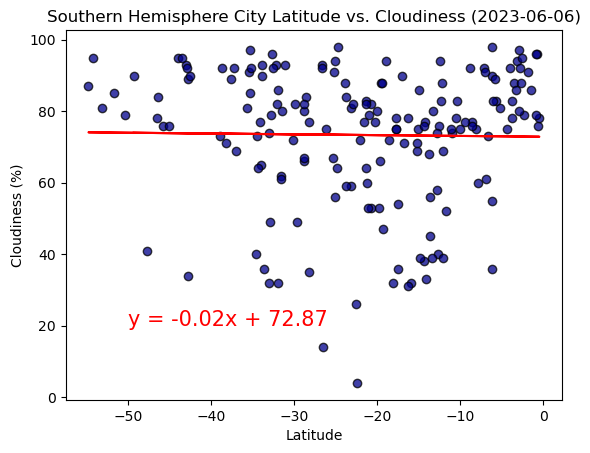

In [20]:
# Southern Hemisphere
# Build scatter plot for latitude vs. temperature
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], marker="o", color="darkblue", edgecolors="black",
            alpha=0.75)
#Linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])
regress_values = southern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot the linear regression line
plt.plot(southern_hemi_df["Lat"],regress_values,"r-")

#Plot the linear regression equation
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")

#Plot the r equation 
# Incorporate the other graph properties
plt.title("Southern Hemisphere City Latitude vs. Cloudiness (%s)" % time.strftime("%Y-%m-%d"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** 

The correlation between Latitude and Cloudiness appear to be weaker due to the small r-value 0.0003 for the Northern Hemisphere and 0.00024 for the Southern Hemisphere, as well as the scatterplot values being quite disperesed.

There seems to be a negative correlation between increasing Latitude and Cloudiness in the Northern Hemisphere, thus if the Latitude increases, the Cloudiness decreases. 

There seems to be a negative correlation between increasing Latitude and Cloudiness in the Southern Hemisphere, thus if the Latitude increases, the Cloudiness decreases. 


### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.007044859257769934


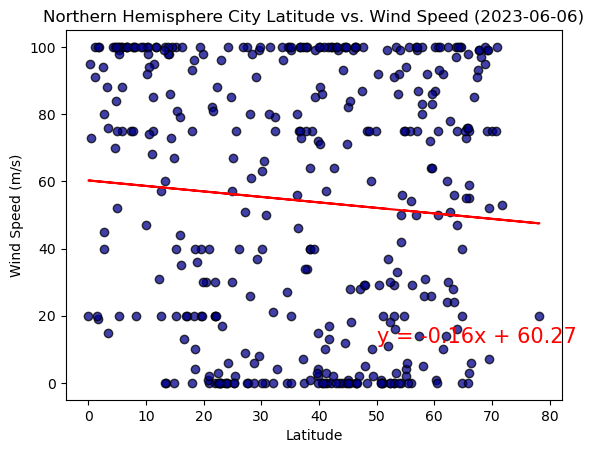

In [21]:
# Northern Hemisphere
# Build scatter plot for latitude vs. temperature
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], marker="o", color="darkblue", edgecolors="black",
            alpha=0.75)
#Linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])
regress_values = northern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot the linear regression line
plt.plot(northern_hemi_df["Lat"],regress_values,"r-")

#Plot the linear regression equation
plt.annotate(line_eq,(50,12),fontsize=15,color="red")

# Incorporate the other graph properties
plt.title("Northern Hemisphere City Latitude vs. Wind Speed (%s)" % time.strftime("%Y-%m-%d"))
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")

#Plot the r equation 
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.003535972727600661


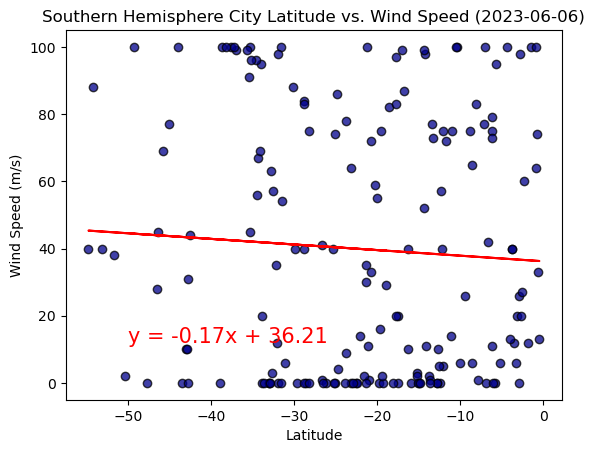

In [22]:
# Southern Hemisphere
# Build scatter plot for latitude vs. temperature
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], marker="o", color="darkblue", edgecolors="black",
            alpha=0.75)
#Linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])
regress_values = southern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot the linear regression line
plt.plot(southern_hemi_df["Lat"],regress_values,"r-")

#Plot the linear regression equation
plt.annotate(line_eq,(-50,12),fontsize=15,color="red")

# Incorporate the other graph properties
plt.title("Southern Hemisphere City Latitude vs. Wind Speed (%s)" % time.strftime("%Y-%m-%d"))
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")

#Plot the r equation 
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** 

The correlation between Latitude and Wind Speed appear to be weak due to the small r-value 0.007 for the Northern Hemisphere and 0.0035 for the Southern Hemisphere, as well as the scatterplot values being disperesed.

There seems to be a slight negative correlation between increasing Latitude and Wind Speed in the Northern Hemisphere, thus if the Latitude increases, the Wind Speed decreases.

There seems to be a slight negative correlation between increasing Latitude and Wind Speed in the Southern Hemisphere, thus if the Latitude increases, the Wind Speed decreases.